In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
points = np.loadtxt('./rand_points_jon.txt')

In [ ]:
fig = plt.figure()
fig.set_size_inches(12,10)
ax = fig.add_subplot(111, projection='3d',)
a = ax.scatter(points[:,0], points[:,1], points[:,2],s=0.1)

In [5]:
%matplotlib notebook

In [4]:
def target(x):
    
    return np.exp(-x)

def lorentz(x):
    
    return 1/(1+x**2)

def gauss(x):
    
    return np.exp(-0.5*x**2)

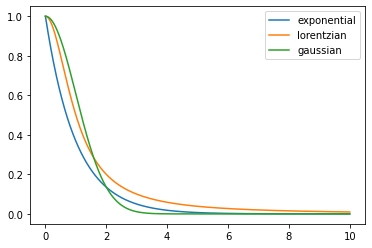

In [5]:
x = np.linspace(0,10,1000)
plt.plot(x,target(x), label='exponential')
plt.plot(x,lorentz(x), label='lorentzian')
plt.plot(x,gauss(x), label='gaussian')
plt.legend()
plt.show()

In [51]:
size = 10000000
rands = np.pi/2*np.random.rand(size)
x_env = np.tan(rands)
r = target(x_env)/lorentz(x_env)
decision = np.random.rand(size)
accept = x_env[decision<=r]

In [52]:
bin_vals, bin_edges = np.histogram(accept,bins=100,density=False)

In [53]:
bin_centers = 0.5*(bin_edges[:-1]+bin_edges[1:])

In [54]:
width = bin_centers[1]-bin_centers[0]

In [55]:
y = target(bin_centers)

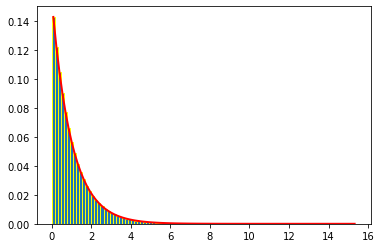

In [56]:
plt.bar(bin_centers, bin_vals/bin_vals.sum(), width=width, edgecolor='yellow')
plt.plot(bin_centers, y/y.sum(),linewidth=2,c='r')

Let's now do it by remapping $\infty$ to $\pi/2$

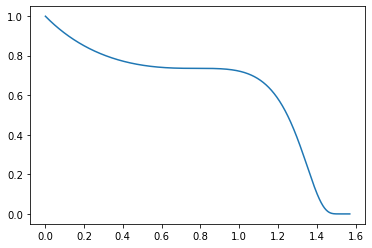

In [58]:
y=np.linspace(0,np.pi/2,1001)
cents=(y[1:]+y[:-1])/2
#for gaussian, prob=exp(-0.5*x**2) goes to exp(-0.5*(tan(y))**2)/cos^2(y)
pp=np.exp(-np.tan(cents))/np.cos(cents)**2
plt.clf()
plt.plot(cents,pp)
plt.show()



In [98]:
n=1000000

z=np.pi*np.random.rand(n)/2
h=np.random.rand(n)*1.1
accept=h<np.exp(-np.tan(z))/np.cos(z)**2
z = z[accept]
y = np.tan(z)

In [101]:
bin_vals, bin_edges = np.histogram(y,bins=100,density=False)
bin_centers = 0.5*(bin_edges[:-1]+bin_edges[1:])
width = bin_centers[1]-bin_centers[0]
f = np.exp(-bin_centers)

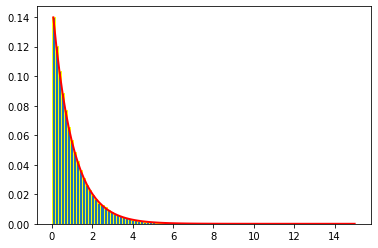

In [102]:
plt.bar(bin_centers, bin_vals/bin_vals.sum(), width=width, edgecolor='yellow')
plt.plot(bin_centers, f/f.sum(),linewidth=2,c='r')

## Ratio of uniforms

Let us make the following transformation:

x = u2/u1

y = u1

### Limits for u1

The area of acceptance is defined by:
$0 \le u_1 \le \sqrt{h(u_2/u_1)}$

so that:
$0 \le u_1 \le sup_x\sqrt{h(x)}$

In the present case we have $h(x) = e^{-x}$. Therefore, $0 \le u_1 \le 1$


### Limits for u2

In order to solve the inequality, first square both sides.

$0 \le u_1^2 \le h(u_2/u_1)$

or, $0 \le u_2^2 \le x^2h(x)$

or, $0 \le u_2 \le \big|x \sqrt{h(x)}\big|$

From the right inequality we obtain

$max\Big[\mathcal{inf_x} x \sqrt{h(x)}, -\mathcal{sup_x} x \sqrt{h(x)}\Big] \le u_2 \le sup_x x \sqrt{h(x)}$

but from the left inequality we obtain

$max\Big[\mathcal{inf_x} x \sqrt{h(x)}, 0\Big] \le u_2$

where supremum is the maximum value of the term and infimum is the minimum.

In our case

$h(x) = e^{-x}$,  $x \in [0, \infty)$

Therefore, $x\sqrt{h(x)} = xe^{-x/2}$. It's maximum occurs at:

$\frac{d(x\sqrt{h(x)})}{dx} = 0$

$e^{-x/2} - \frac{xex^{-x/2}}{2} = 0$

$x = 2$

$sup_x x\sqrt{h(x)} = \frac{2}{e} = 0.73576 $

and minimum value over this range is 0.

Therefore, bounds for u2 are:

$0 \le u_2 \le 0.737576$


In [24]:
n = 1000000
u1 = np.random.rand(n)
u2 = np.random.rand(n)*0.607
x = u2/u1
accept = (u1**2 <= np.exp(-x))

In [25]:
vals_x = x[accept]

In [26]:
vals_u1 = u1[accept]
vals_u2 = u2[accept]

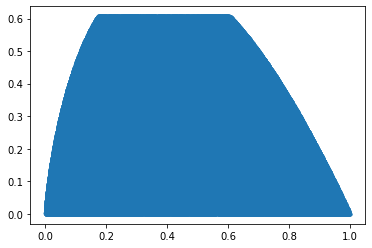

In [27]:
plt.plot(vals_u1, vals_u2, '.')

In [30]:
efficiency = vals_x.shape[0]/2/n
print("Efficiency is:", efficiency)

Efficiency is: 0.381607


In [40]:
bin_vals, bin_edges = np.histogram(vals,bins=100,density=False)
bin_centers = 0.5*(bin_edges[:-1]+bin_edges[1:])
width = bin_centers[1]-bin_centers[0]
f = np.exp(-bin_centers)

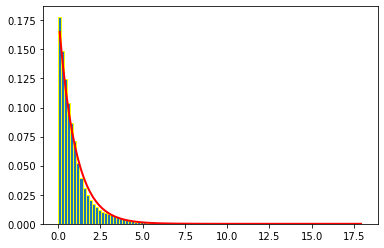

In [41]:
plt.bar(bin_centers, bin_vals/bin_vals.sum(), width=width, edgecolor='yellow')
plt.plot(bin_centers, f/f.sum(),linewidth=2,c='r')

(0.0, 10.0)

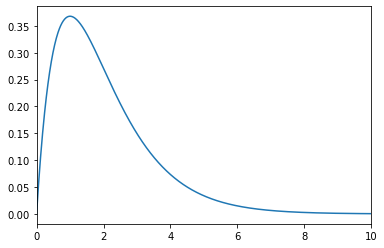

In [4]:
x = np.linspace(0,1000,100000)
plt.plot(x, x*np.exp(-x))
plt.xlim([0,10])

In [5]:
np.exp(-0.5)

0.6065306597126334